(evolution)=

# Plot Evolution

This notebook shows an example on how to import the bolometric properties of the SLSN population and plot their evolution. First, import the required packages.

In [1]:
from slsne.utils import cb_g
from slsne.lcurve import get_evolution
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 11})
plt.rcParams.update({'font.family': 'serif'})

Use the `get_evolution` function to get the bolometric luminosity, radius, and temperature evolution of all SLSNe in extrabol.

In [ ]:
# Samples are the time samples at which the light curve is sampled
samples, interp_lum_array, interp_temp_array, interp_radius_array = get_evolution()

Now we can calculate the 1, 2, and 3 sigma ranges for each of these parameters:

In [3]:
lum_low3, lum_low2, lum_low1, lum_mean, lum_hi1, lum_hi2, lum_hi3 =\
    np.nanpercentile(interp_lum_array, [0.13, 2.28, 15.87, 50, 84.13, 97.72, 99.87], axis = 0)
temp_low3, temp_low2, temp_low1, temp_mean, temp_hi1, temp_hi2, temp_hi3 =\
    np.nanpercentile(interp_temp_array, [0.13, 2.28, 15.87, 50, 84.13, 97.72, 99.87], axis = 0)
radius_low3, radius_low2, radius_low1, radius_mean, radius_hi1, radius_hi2, radius_hi3 =\
    np.nanpercentile(interp_radius_array, [0.13, 2.28, 15.87, 50, 84.13, 97.72, 99.87], axis = 0)

Finally plot the results

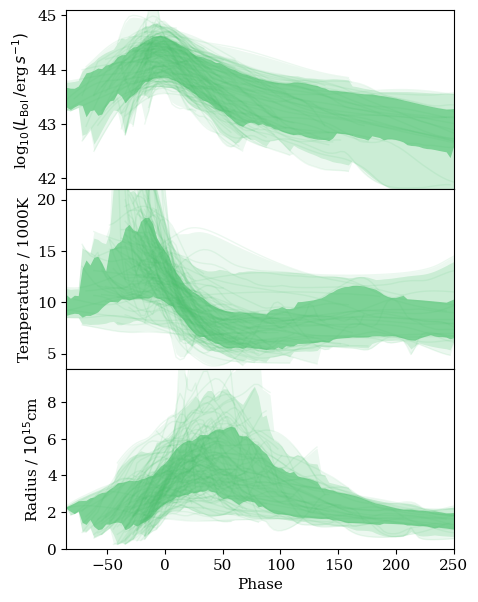

In [4]:
xmin, xmax = np.min(samples), np.max(samples)

plt.figure(figsize=(5,7))
plt.subplots_adjust(hspace=0)

plt.subplot(311)
plt.ylim(41.8, 45.1)
plt.xlim(xmin, xmax)
plt.plot(samples, interp_lum_array.T, color = cb_g, alpha = 0.1, linewidth = 1)
plt.fill_between(samples, lum_low1, lum_hi1, alpha = 0.6, color = cb_g, linewidth = 0)
plt.fill_between(samples, lum_low2, lum_hi2, alpha = 0.2, color = cb_g, linewidth = 0)
plt.fill_between(samples, lum_low3, lum_hi3, alpha = 0.1, color = cb_g, linewidth = 0)
plt.ylabel(r'log$_{10} (\mathit{L}_{\rm Bol}\,/$erg$\,s^{-1})$')
plt.tick_params(axis='both', bottom=False, labelbottom=False)

plt.subplot(312)
plt.ylim(3.5, 21)
plt.xlim(xmin, xmax)
plt.plot(samples, interp_temp_array.T, color = cb_g, alpha = 0.1, linewidth = 1)
plt.fill_between(samples, temp_low1, temp_hi1, alpha = 0.6, color = cb_g, linewidth = 0)
plt.fill_between(samples, temp_low2, temp_hi2, alpha = 0.2, color = cb_g, linewidth = 0)
plt.fill_between(samples, temp_low3, temp_hi3, alpha = 0.1, color = cb_g, linewidth = 0)
plt.ylabel('Temperature / 1000K')
plt.tick_params(axis='both', bottom=False, labelbottom=False)

plt.subplot(313)
plt.ylim(0, 9.8)
plt.xlim(xmin, xmax)
plt.plot(samples, interp_radius_array.T, color = cb_g, alpha = 0.1, linewidth = 1)
plt.fill_between(samples, radius_low1, radius_hi1, alpha = 0.6, color = cb_g, linewidth = 0)
plt.fill_between(samples, radius_low2, radius_hi2, alpha = 0.2, color = cb_g, linewidth = 0)
plt.fill_between(samples, radius_low3, radius_hi3, alpha = 0.1, color = cb_g, linewidth = 0)
plt.ylabel(r'Radius / $10^{15}$cm')
plt.tick_params(axis='both')
plt.xlabel('Phase')
plt.show();